In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("/Users/hongyizhan/Desktop/MCGILL/ml insy695/DataCo_Supply_Chain/data/DataCoSupplyChainDataset.csv",encoding='ISO-8859-1')

In [5]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [7]:
data['order date']= pd.to_datetime(data['order date (DateOrders)'])
data['shipping date']= pd.to_datetime(data['shipping date (DateOrders)'])
data['order year']=data['order date'].dt.year
data['order month']=data['order date'].dt.month
data['order day']=data['order date'].dt.day
data['order hour']=data['order date'].dt.hour
data['order minute']=data['order date'].dt.minute

data['shipping year']=data['shipping date'].dt.year
data['shipping month']=data['shipping date'].dt.month
data['shipping day']=data['shipping date'].dt.day
data['shipping hour']=data['shipping date'].dt.hour
data['shipping minute']=data['shipping date'].dt.minute

In [8]:
data_n=data.loc[:,['Type','Days for shipment (scheduled)','order year','order month','order day','order hour','order minute','Benefit per order','Category Name','Latitude','Longitude','Customer Segment','Department Name','Market','Order City','Order Country','Order Item Discount','Order Item Product Price','Order Item Quantity','Order Item Total','Order State','Product Name','shipping year','shipping month','shipping day','shipping hour','shipping minute','Shipping Mode','Late_delivery_risk','Order Status']]
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   order year                     180519 non-null  int64  
 3   order month                    180519 non-null  int64  
 4   order day                      180519 non-null  int64  
 5   order hour                     180519 non-null  int64  
 6   order minute                   180519 non-null  int64  
 7   Benefit per order              180519 non-null  float64
 8   Category Name                  180519 non-null  object 
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Customer Segment               180519 non-null  object 
 12  Department Name               

In [9]:
data_n['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [10]:
data_n['Order Status']= [0 if i!='SUSPECTED_FRAUD' else 1 for i in data_n['Order Status']]

In [11]:
data_n['Order Status'].value_counts()

0    176457
1      4062
Name: Order Status, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
for i in data_n.columns:
    if data_n[i].dtype=='object':
        data_n[i]=enc.fit_transform(data_n[i])

In [13]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   order year                     180519 non-null  int64  
 3   order month                    180519 non-null  int64  
 4   order day                      180519 non-null  int64  
 5   order hour                     180519 non-null  int64  
 6   order minute                   180519 non-null  int64  
 7   Benefit per order              180519 non-null  float64
 8   Category Name                  180519 non-null  int64  
 9   Latitude                       180519 non-null  float64
 10  Longitude                      180519 non-null  float64
 11  Customer Segment               180519 non-null  int64  
 12  Department Name               

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

y=data_n['Order Status']
X=data_n.drop(['Order Status'],axis=1)
name = X.columns
X=StandardScaler().fit_transform(X)
X = pd.DataFrame(X, columns=name)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE to generate synthetic samples to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [15]:
y_resampled.value_counts()

0    132361
1    132361
Name: Order Status, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE with the RandomForestClassifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=15, step=1)

# Fit RFE
rfe.fit(X_train, y_train)

# Transform the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train a new classifier on the transformed data
rf_classifier.fit(X_train_rfe, y_train)

# Evaluate the model
score = rf_classifier.score(X_test_rfe, y_test)
print(f"Model score after RFE: {score:.4f}")

# Get the ranking of the features
ranking = rfe.ranking_
print(f"Feature ranking: {ranking}")

Model score after RFE: 0.9961
Feature ranking: [ 1  7 11  1  1  1  1  2  9  1  1 12 14 10  1  1  4  8 15  3  1  6 13  5
  1  1  1  1  1]


In [17]:
selected_features = name[rfe.support_]
print("Selected features:", selected_features.tolist())

Selected features: ['Type', 'order month', 'order day', 'order hour', 'order minute', 'Latitude', 'Longitude', 'Order City', 'Order Country', 'Order State', 'shipping day', 'shipping hour', 'shipping minute', 'Shipping Mode', 'Late_delivery_risk']


In [18]:
X_resampled_sel = X_resampled[selected_features.tolist()]
X_test_sel =  X_test[selected_features.tolist()]



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_resampled_sel, y_resampled)

y_pred = voting_clf.predict(X_test_sel)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     44096
           1       0.19      0.98      0.32      1034

    accuracy                           0.90     45130
   macro avg       0.60      0.94      0.63     45130
weighted avg       0.98      0.90      0.93     45130



Confusion Matrix:
[[39792  4304]
 [   16  1018]]


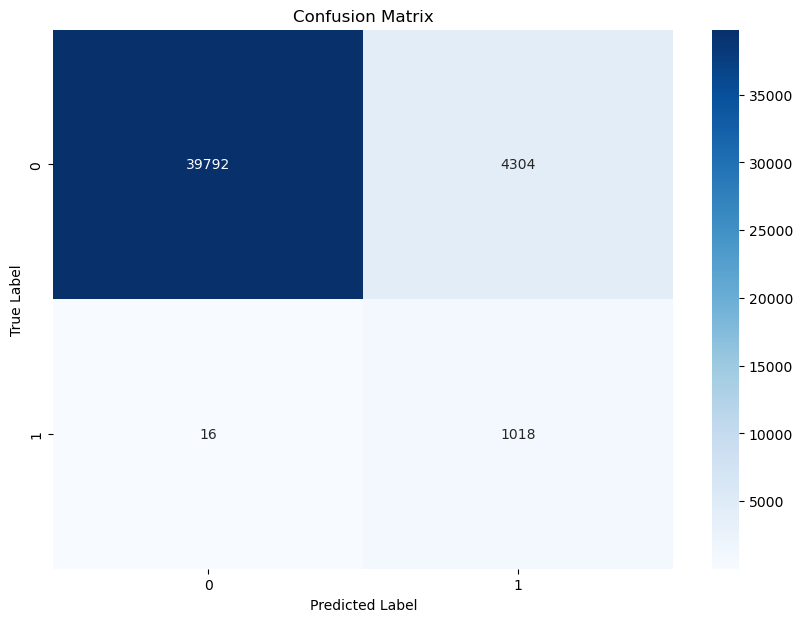

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred are the predictions from your voting classifier on the test set
# and y_test are the true labels

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# For a more visual representation, you can plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up the grid search with cross-validation
grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search model
grid_xgb.fit(X_resampled_sel, y_resampled)

# Best parameters and best score
print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best Score for XGBoost:", grid_xgb.best_score_)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score for XGBoost: 0.9675676322615614


In [31]:
import lightgbm as lgb
import lightgbm as lgb

# Define the parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier()

# Set up the grid search with cross-validation
grid_lgb = GridSearchCV(lgb_clf, param_grid_lgb, cv=5, scoring='f1', n_jobs=-1)

# Fit the grid search model
grid_lgb.fit(X_resampled_sel, y_resampled)

# Best parameters and best score
print("Best Parameters for LightGBM:", grid_lgb.best_params_)
print("Best Score for LightGBM:", grid_lgb.best_score_)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 132361, number of negative: 132361
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 264722, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}
Best Score for LightGBM: 0.9936831484287284


XGBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     44096
           1       0.25      0.91      0.39      1034

    accuracy                           0.93     45130
   macro avg       0.62      0.92      0.68     45130
weighted avg       0.98      0.93      0.95     45130

LightGBM Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     44096
           1       0.65      0.80      0.72      1034

    accuracy                           0.99     45130
   macro avg       0.82      0.90      0.86     45130
weighted avg       0.99      0.99      0.99     45130



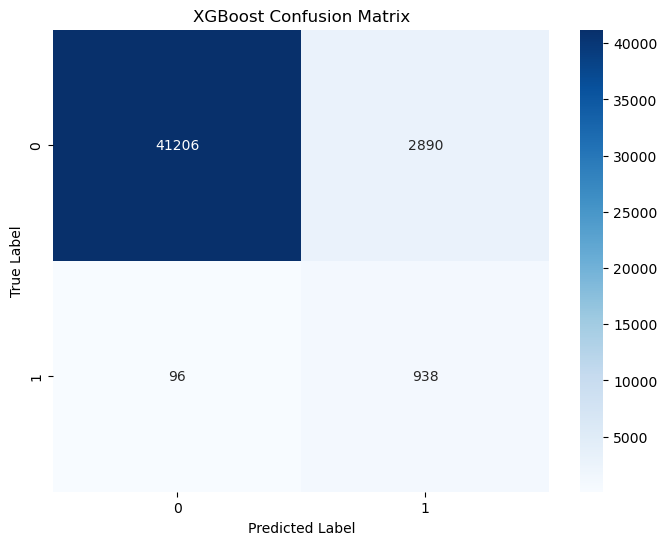

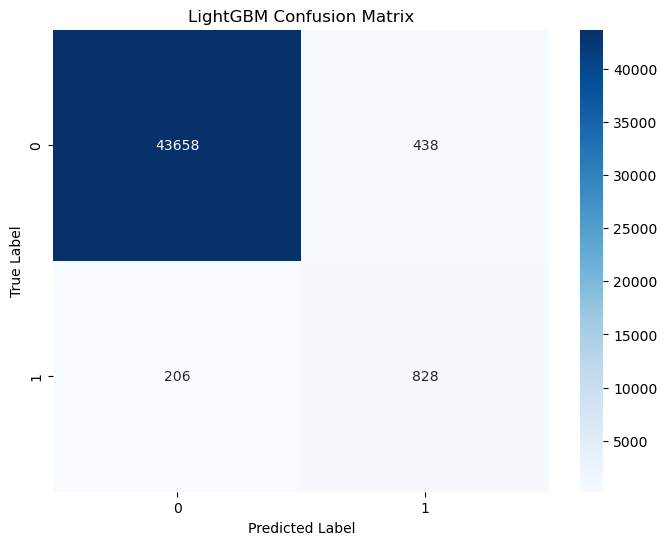

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105888, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211777, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000009
[LightGBM] [Info] Start training from score -0.000009
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `fo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211778, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3321
[LightGBM] [Info] Number of data points in the train set: 211778, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105888, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211777,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211777, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000009
[LightGBM] [Info] Start training from score 0.000009
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211778, number of 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087959 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211778, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3321
[LightGBM] [Info] Number of data points in the train set: 211778,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105888, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211777, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499998 -> initscore=-0.000009
[LightGBM] [Info] Start training from score -0.000009
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `fo

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006077 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211778, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 105889, number of negative: 105888
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3322
[LightGBM] [Info] Number of data points in the train set: 211777, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions with the best models
y_pred_xgb = grid_xgb.best_estimator_.predict(X_test_sel)
y_pred_lgb = grid_lgb.best_estimator_.predict(X_test_sel)

# Classification report
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

print("LightGBM Classification Report")
print(classification_report(y_test, y_pred_lgb))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    conf_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_lgb, "LightGBM Confusion Matrix")


[12:09:43] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


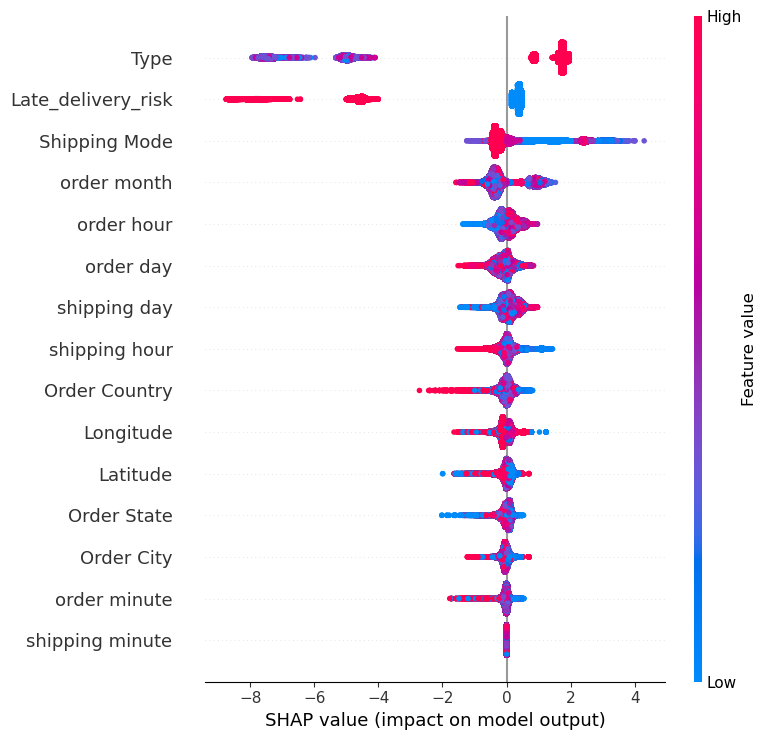

In [20]:
import shap

# Load JS visualization code to notebook
shap.initjs()

# Access the best estimator
best_xgb_model = grid_xgb.best_estimator_


# Explain the model's predictions using SHAP
explainer = shap.Explainer(best_xgb_model)

# Compute SHAP values
shap_values = explainer(X_resampled_sel)

shap.summary_plot(shap_values, X_resampled_sel)


In [21]:
# Load JS visualization code to the notebook
shap.initjs()

# Find indices where the label is 1
indices_label_1 = [i for i, label in enumerate(y_resampled) if label == 1]

instance_index = indices_label_1[0]  # Adjust this index to plot other instances
shap.force_plot(explainer.expected_value, shap_values.values[instance_index], feature_names=X_resampled_sel.columns)

In [22]:
indices_label_0 = [i for i, label in enumerate(y_resampled) if label == 0]

instance_index = indices_label_0[0]  # Adjust this index to plot other instances
shap.force_plot(explainer.expected_value, shap_values.values[instance_index], feature_names=X_resampled_sel.columns)

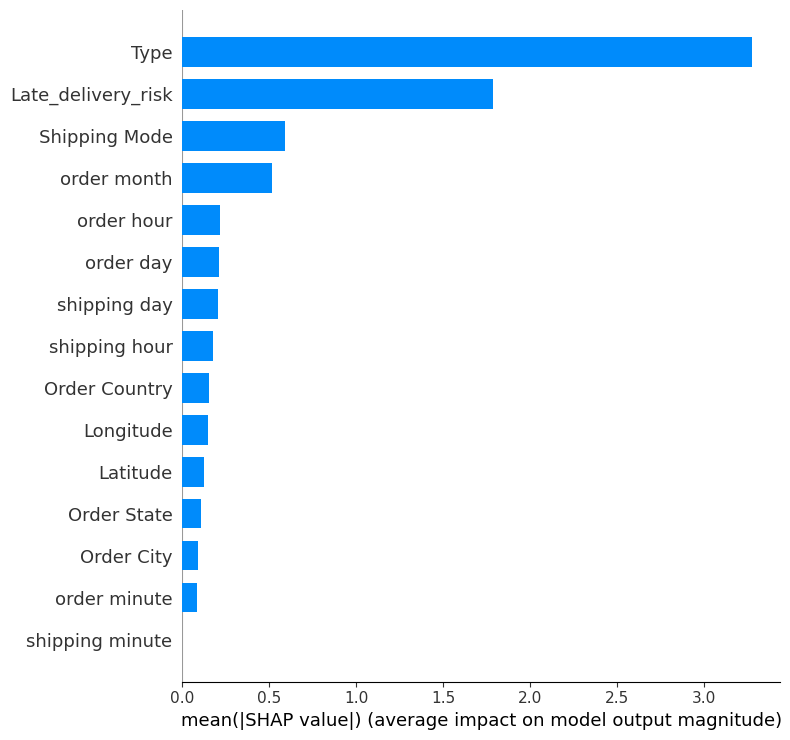

In [23]:
# Import SHAP if you haven't already
import shap

# Ensure SHAP values are computed; for example, using:
# shap_values = explainer(X_resampled_sel)

# Generate the summary plot
shap.summary_plot(shap_values, X_resampled_sel, plot_type="bar")
